# 2) Salary_hike -> Build a prediction model for Salary_hike

In [67]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [68]:
# load the Salary_Data.csv
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [69]:
# Rename the column name as Experience_in_years
df = df.rename({'YearsExperience':'Experience_in_years'},axis = 1)

In [70]:
df.head()

,Experience_in_years,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [71]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experience_in_years  30 non-null     float64
 1   Salary               30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [72]:
df.shape

(30, 2)

In [73]:
df.describe()

,Experience_in_years,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [74]:
# check the correlation between the data
corel = df.corr()

In [75]:
corel

,Experience_in_years,Salary
Experience_in_years,1.000000,0.978242
Salary,0.978242,1.000000


# there is a positive correlation between the experience and salary

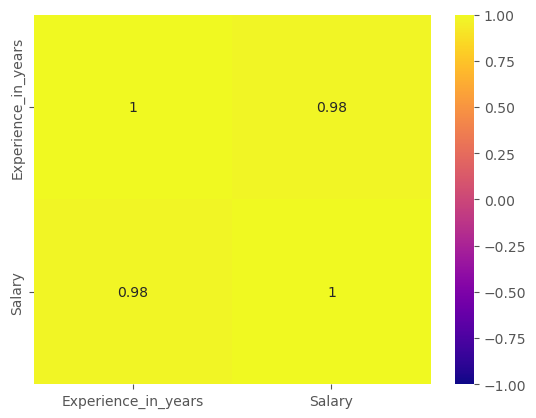

In [76]:
# heat map visualisation
sns.heatmap(data = corel , vmin = -1 , vmax = 1 , annot = True , cmap = 'plasma');

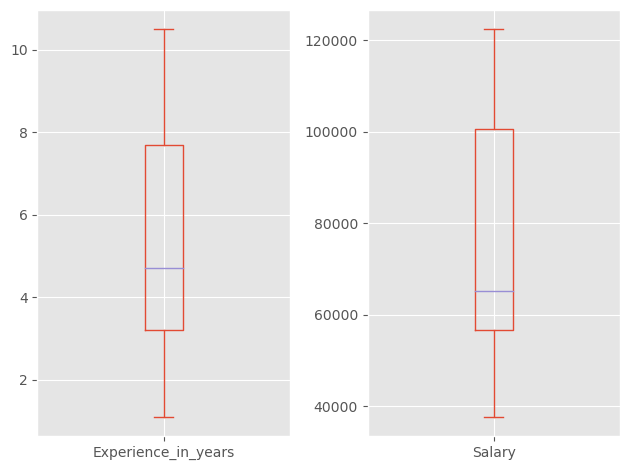

In [77]:
# outliers detection
df.plot(kind = 'box' , subplots = True)
plt.tight_layout();

In [78]:
# differentiate the target variable and independent variable
# Apply log transformations to Y
x = df.drop('Salary', axis = 1)
y_log = np.log(df['Salary'])

In [79]:
df.head()

,Experience_in_years,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [80]:
# We are going to build a simple linear regression model by sklearn library
# import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
# Split the data into rain and test data
x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(x,y_log,test_size=0.2,random_state=42)

In [92]:
# create a linear regression model using sklearn & fit it on the data
lr_log = LinearRegression()
lr_log.fit(x_train_log,y_train_log)

LinearRegression()

In [93]:
# get the prdictions of the model for train and test data observations
pred_train_log = lr_log.predict(x_train_log)
pred_test_log = lr_log.predict(x_test_log)
pred_train_log,pred_test_log

(array([11.7938329 , 11.590558  , 10.99343798, 10.62500223, 10.76475372,
        11.13318948, 10.85368649, 11.00614266, 10.99343798, 11.48892055,
        10.65041159, 10.67582095, 11.62867205, 10.73934436, 11.3872831 ,
        11.69219545, 11.23482693, 11.81924227, 11.34916906, 10.89180053,
        10.9807333 , 11.05696139, 11.24753161, 10.86639117]),
 array([11.70490014, 11.10778012, 11.5270346 , 11.15859884, 10.89180053,
        10.95532394]))

In [84]:
pred_train_log[:5]

array([11.7938329 , 11.590558  , 10.99343798, 10.62500223, 10.76475372])

In [85]:
pred_test_log[:5]

array([11.70490014, 11.10778012, 11.5270346 , 11.15859884, 10.89180053])

In [94]:
lr_log.coef_

array([0.12704681])

In [95]:
lr_log.intercept_

10.485250731931437

In [88]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error

In [101]:
mse_train_log = mean_squared_error(y_train_log,pred_train_log,squared = False)
mse_test_log = mean_squared_error(y_test_log,pred_test_log,squared=False)
mse_train_log , mse_test_log

(0.08989768731525927, 0.11588820167551828)

# Apply Square root transoformation to target variable

In [96]:
y_sqrt = np.sqrt(df['Salary'])

In [97]:
x_train_sqrt,x_test_sqrt,y_train_sqrt,y_test_sqrt = train_test_split(x,y_sqrt,test_size=0.2,random_state=42)

In [98]:
lr_sqrt = LinearRegression()
lr_sqrt.fit(x_train_sqrt,y_train_sqrt)

LinearRegression()

In [100]:
# get the prdictions of the model for train and test data observations
pred_train_sqrt = lr_sqrt.predict(x_train_sqrt)
pred_test_sqrt = lr_sqrt.predict(x_test_sqrt)
pred_train_sqrt,pred_test_sqrt

(array([355.30224044, 327.88826633, 247.35971739, 197.67188932,
        216.51899652, 266.20682459, 228.51261019, 249.07309077,
        247.35971739, 314.18127928, 201.09863608, 204.52538284,
        333.02838648, 213.09224975, 300.47429222, 341.59525339,
        279.91381164, 358.7289872 , 295.33417208, 233.65273033,
        245.64634401, 255.9265843 , 281.62718502, 230.22598357]),
 array([343.30862677, 262.78007782, 319.32139942, 269.63357135,
        233.65273033, 242.21959724]))

In [102]:
# calculating mean squared errors values
mse_train_sqrt = mean_squared_error(y_train_sqrt,pred_train_sqrt,squared = False)
mse_test_sqrt = mean_squared_error(y_test_sqrt,pred_test_sqrt,squared=False)
mse_train_sqrt , mse_test_sqrt

(10.207804417414634, 13.865851776555699)

# Apply Square  transformation to target variable

In [103]:
y_sqre = df['Salary']**2

In [104]:
x_train_sqre,x_test_sqre,y_train_sqre,y_test_sqre = train_test_split(x,y_sqre,test_size=0.2,random_state=42)

In [105]:
lr_sqre = LinearRegression()
lr_sqre.fit(x_train_sqre,y_train_sqre)

LinearRegression()

In [106]:
# get the prdictions of the model for train and test data observations
pred_train_sqre = lr_sqre.predict(x_train_sqre)
pred_test_sqre = lr_sqre.predict(x_test_sqre)
pred_train_sqre,pred_test_sqre

(array([1.39649148e+10, 1.15570643e+10, 4.48400325e+09, 1.19774111e+08,
        1.77517137e+09, 6.13940051e+09, 2.82860599e+09, 4.63449391e+09,
        4.48400325e+09, 1.03531390e+10, 4.20755431e+08, 7.21736751e+08,
        1.20085363e+10, 1.47419005e+09, 9.14921372e+09, 1.27609896e+10,
        7.34332580e+09, 1.42658962e+10, 8.69774174e+09, 3.28007797e+09,
        4.33351259e+09, 5.23645655e+09, 7.49381646e+09, 2.97909665e+09]),
 array([1.29114802e+10, 5.83841919e+09, 1.08046110e+10, 6.44038184e+09,
        3.28007797e+09, 4.03253127e+09]))

In [107]:
# calculating mean squared errors values
mse_train_sqre = mean_squared_error(y_train_sqre,pred_train_sqre,squared = False)
mse_test_sqre = mean_squared_error(y_test_sqre,pred_test_sqre,squared=False)
mse_train_sqre , mse_test_sqre

(978069534.110729, 1134286891.6637993)

# The error is low when we perform square transformational model